### Import module

In [1]:
from deepface import DeepFace
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd

### Select models

In [2]:
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "Dlib", "ArcFace"]

In [3]:
img1 = "Image/Rifa Fachri Ramadhan.jpg" 

In [4]:
image = DeepFace.detectFace(img1)

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


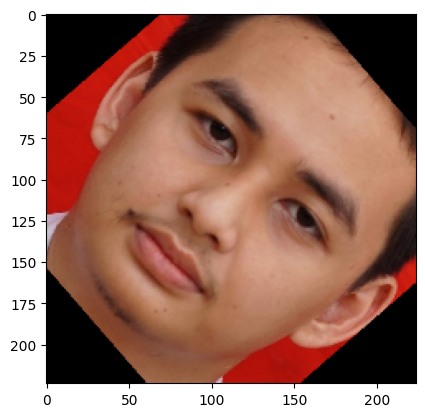

In [5]:
plt.imshow(image)

In [6]:
df = DeepFace.find(img_path=img1, db_path = 'image/', model_name = models[0], enforce_detection=False)

Finding representations:   0%|          | 0/2 [00:00<?, ?it/s]

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: C:\Users\Arfan\.deepface\weights\vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  0%|          | 524k/580M [00:02<41:19, 234kB/s]
  0%|          | 1.05M/580M [00:04<44:46, 216kB/s]
  0%|          | 1.57M/580M [00:06<39:44, 243kB/s]
  0%|          | 2.10M/580M [00:08<37:27, 257kB/s]
  0%|          | 2.62M/580M [00:10<34:49, 276kB/s]
  1%|          | 3.15M/580M [00:11<33:38, 286kB/s]
  1%|          | 3.67M/580M [00:13<33:06, 290kB/s]
  1%|          | 4.19M/580M [00:17<44:05, 218kB/s]
  1%|          | 4.72M/580M [00:19<42:32, 225kB/s]
  1%|          | 5.24M/580M [00:21<40:25, 237kB/s]
  1%|          | 5.77M/580M [00:23<38:16, 250kB/s]
  1%|          | 6.29M/580M [00:25<38:34, 248kB/s]
  1%|          | 6.82M/580M [00:27<38:08, 250kB/s]
  1%|▏         | 7.34M/580M [00:29<36:42, 260kB/s]
  1%|▏         | 7.86M/580M [00:31<35:09, 271kB/s]
  1%|▏         | 8.39M/580M

Representations stored in image//representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  3191.6513872146606  seconds


In [7]:
df

[                          identity  source_x  source_y  source_w  source_h  \
 0  image//Rifa Fachri Ramadhan.jpg       378       320       623       623   
 1      image//Servasius Vencel.jpg       378       320       623       623   
 
    VGG-Face_cosine  
 0     7.771561e-16  
 1     2.175998e-01  ]

In [8]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [9]:
images = load_images_from_folder("image/")

In [10]:
images

[array([[[ 17,  30, 212],
         [ 17,  30, 212],
         [ 18,  31, 213],
         ...,
         [ 19,  33, 215],
         [ 19,  33, 215],
         [ 19,  33, 215]],
 
        [[ 18,  31, 213],
         [ 18,  31, 213],
         [ 18,  31, 213],
         ...,
         [ 18,  32, 214],
         [ 19,  33, 215],
         [ 19,  33, 215]],
 
        [[ 18,  31, 213],
         [ 18,  31, 213],
         [ 18,  31, 213],
         ...,
         [ 18,  32, 214],
         [ 18,  32, 214],
         [ 19,  33, 215]],
 
        ...,
 
        [[165, 154, 162],
         [185, 177, 184],
         [ 75,  65,  71],
         ...,
         [233, 224, 234],
         [219, 209, 221],
         [187, 177, 189]],
 
        [[178, 167, 177],
         [183, 172, 180],
         [142, 131, 139],
         ...,
         [150, 140, 152],
         [177, 167, 179],
         [ 60,  50,  62]],
 
        [[130, 118, 130],
         [206, 195, 205],
         [158, 147, 157],
         ...,
         [ 64,  54,  67],
  

In [11]:
def verify(img1_path,img2_path, model_name):
    img1= cv2.imread(img1_path)
    img2= cv2.imread(img2_path)

    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()

    output = DeepFace.verify(img1_path,img2_path, model_name=model_name)
    print(output)

    verification = output['verified']

    if verification:
        print('Benar')
    else:
        print('Salah')

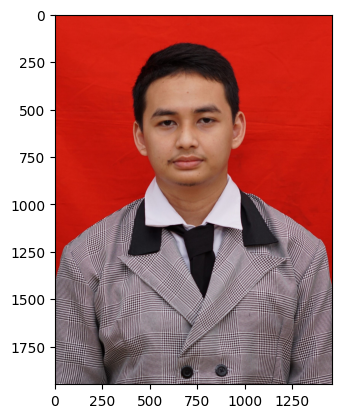

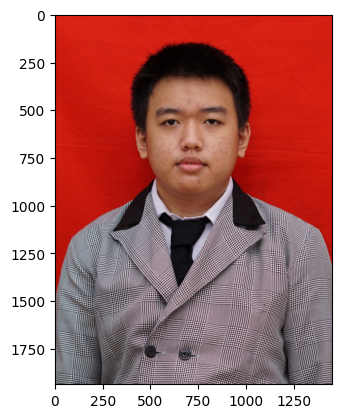

{'verified': True, 'distance': 0.2175997870643469, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 378, 'y': 320, 'w': 623, 'h': 623}, 'img2': {'x': 404, 'y': 320, 'w': 621, 'h': 621}}, 'time': 1.27}
Benar


In [13]:
verify("image/Rifa Fachri Ramadhan.jpg","image/Servasius Vencel.jpg", model_name = models[0])